In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
79,22-05-2020,6342,124795
80,23-05-2020,6627,131422
81,24-05-2020,7627,139049
82,25-05-2020,6305,145354


In [3]:
dt['days']=np.arange(0, len(dt), 1)
data=dt[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
79,79,124795
80,80,131422
81,81,139049
82,82,145354


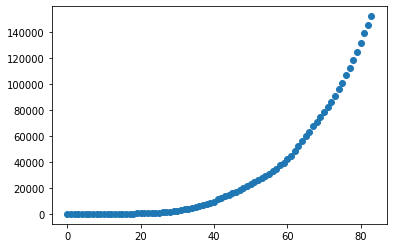

In [4]:
plt.scatter(data['days'], data['confirmed'])

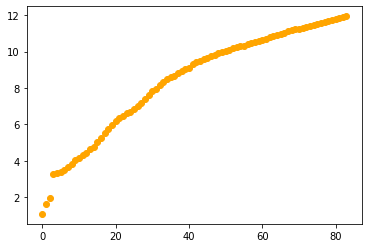

In [5]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [6]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

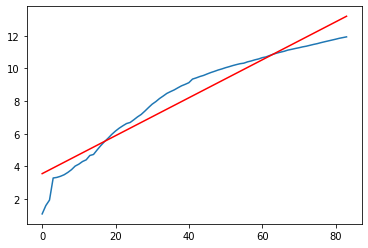

In [7]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

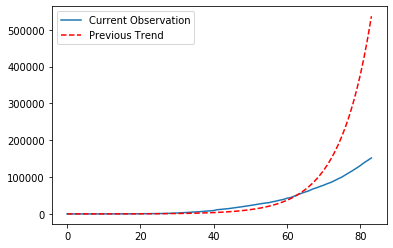

In [8]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [9]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9301180283206921

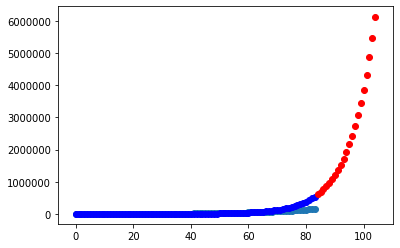

In [10]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [11]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104]),
 array([[ 602672.70383267],
        [ 676817.35642925],
        [ 760083.75864831],
        [ 853594.12649953],
        [ 958608.73818727],
        [1076542.91940526],
        [1208986.11827091],
        [1357723.32698009],
        [1524759.13889096],
        [1712344.76526424],
        [1923008.37577569],
        [2159589.17171263],
        [2425275.65107311],
        [2723648.58128248],
        [3058729.25868848],
        [3435033.70524828],
        [3857633.53283876],
        [4332224.29548371],
        [4865202.25070944],
        [5463750.56457351],
        [6135936.12218778]]))

In [12]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt 

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
79,22-05-2020,6342,124795
80,23-05-2020,6627,131422
81,24-05-2020,7627,139049
82,25-05-2020,6305,145354


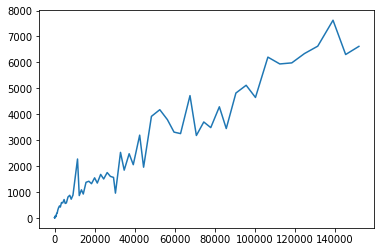

In [13]:
plt.plot(dt['confirmed'],dt['Infected'])

In [14]:
m

array([0.11602718])

In [15]:
1.0+m*14+m**2*24

array([2.94747594])

# State-Wise

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           1590 non-null   object
 1   Place           1551 non-null   object
 2   Date            1590 non-null   object
 3   Time            1590 non-null   object
 4   Infected        1590 non-null   int64 
 5   Total_Infected  1590 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 74.7+ KB


In [17]:
df['State'].unique()

array(['Kerela', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu And Kashmir',
       'Punjab', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Odisha',
       'Uttarakhand', 'West Bengal', 'Pondicherry', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman And Nicobar', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Dadra And Nagar Haveli', 'Meghalaya', 'Nagaland', 'Unassigned',
       'Sikkim'], dtype=object)

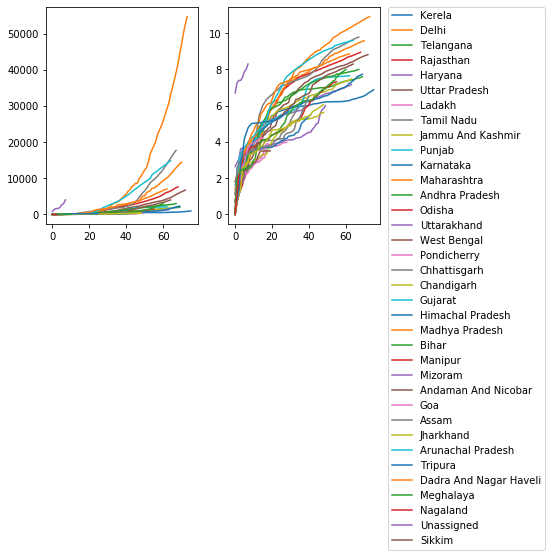

In [18]:
fig, ((ax1), (ax2))=plt.subplots(1,2)

def state(statename):
    statedata=df.loc[df['State']==statename]
    grouped=statedata.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
    grouped['confirmed']=grouped['Infected'].cumsum()
    ax1.plot(grouped.index, grouped['confirmed'], label=statename)
    #ax1.legend()
    ax2.plot(grouped.index, np.log(grouped['confirmed']), label=statename)
    #ax2.legend()

    return

for states in df['State'].unique():
    state(states)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout(pad=10.0)    
plt.show()